In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# pip install openpyxl

In [ ]:
orders = pd.read_excel(r"C:\Users\User\Documents\Python Scripts\EDA_Global Stores\global_superstore_2016.xlsx", sheet_name='Orders')

In [ ]:
returns = pd.read_excel(r"C:\Users\User\Documents\Python Scripts\EDA_Global Stores\global_superstore_2016.xlsx", sheet_name='Returns')

In [ ]:
people = pd.read_excel(r"C:\Users\User\Documents\Python Scripts\EDA_Global Stores\global_superstore_2016.xlsx", sheet_name='People')

In [ ]:
orders.shape

In [ ]:
returns.shape

In [ ]:
people.shape

In [ ]:
orders.iloc[:6, 12:]

In [ ]:
orders[orders['Order ID'].str.contains("IN-2014-JR162107-41675")].head(1)

In [ ]:
returns.head()

In [ ]:
people.head()

Merge 2 tables, order and return based on columns order ID and Region

In [ ]:
import pandas as pd
order_return_merge= pd.merge(orders, returns, on=['Order ID', 'Region'], how='left')

In [ ]:
order_return_merge.shape

In [ ]:
order_return_merge.head()

In [ ]:
order_return_merge[["Sales","Quantity","Discount","Profit","Shipping Cost"]].head()

In [ ]:
order_return_merge.columns

In [ ]:
order_return_merge.info()

In [ ]:
order_return_merge.isnull().sum()

In [ ]:
order_return_merge.duplicated().sum()

Data reduction

In [ ]:
order_return_merge.drop(["Row ID", "Order ID", "Ship Date", "Customer ID", "Postal Code", "Product Name"], axis =1, inplace=True)

In [ ]:
order_return_merge['Returned'].fillna("No", inplace=True)

In [ ]:
order_return_merge.isnull().sum()

In [ ]:
df = order_return_merge

Feature Engineering

In [ ]:
df['year'] = df['Order Date'].dt.year
df['month'] = df['Order Date'].dt.month

In [ ]:
# Total revenue generated from sales
df['total sales'] = df['Sales'] * df['Quantity']

# Total revenue generated from sales
df['total profit'] = df['Profit'] * df['Quantity']

# Total cost incured for shipping
df['total cost'] = df['Shipping Cost'] * df['Quantity']

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      51290 non-null  datetime64[ns]
 1   Ship Mode       51290 non-null  object        
 2   Customer Name   51290 non-null  object        
 3   Segment         51290 non-null  object        
 4   City            51290 non-null  object        
 5   State           51290 non-null  object        
 6   Country         51290 non-null  object        
 7   Region          51290 non-null  object        
 8   Market          51290 non-null  object        
 9   Product ID      51290 non-null  object        
 10  Category        51290 non-null  object        
 11  Sub-Category    51290 non-null  object        
 12  Sales           51290 non-null  float64       
 13  Quantity        51290 non-null  int64         
 14  Discount        51290 non-null  float64       
 15  Pr

In [ ]:
df.describe().T

Data Visualisation 

In [ ]:
cat_column = df.select_dtypes(include=['object']).columns.to_list()
num_column = df.select_dtypes(np.number).columns.to_list()

In [ ]:
for col in num_column:
    plt.subplot(1,1,1)
    df[col].hist(bins=20, alpha=0.5, grid=False)
    plt.ylabel("frequency")
    plt.title(col)
    plt.show()

In [ ]:
import seaborn as sns
for col in cat_column:
    plt.figure()
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, palette='Set2')
    plt.xticks(rotation=90)
    plt.title(col) 
    plt.show()


In [39]:
print(f"Net profit is: {df["Profit"].sum()}")

Net profit is: 1467457.2912799998


In [40]:
print(f"Net sales is: {df["Sales"].sum()}")

Net sales is: 12642501.90988


In [41]:
print(f"Gross sales is: {df["total sales"].sum()}")

Gross sales is: 61821272.47008


In [42]:
print(f"Gross profit is: {df["total profit"].sum()}")

Gross profit is: 7228245.59588


In [46]:
print(f"Profit Margin: {(df["total profit"].sum() / df["total sales"].sum() *100).round(2)} %")

Profit Margin: 11.69 %


In [50]:
print(f"Total Cost: {(df["total sales"].sum() - df["Profit"].sum()-  df["Shipping Cost"].sum()).round(2)}")

Total Cost: 58995729.48


In [51]:
print(f"Net Profit: {(df["Profit"].sum() - df["Shipping Cost"].sum()).round(2)}")

Net Profit: 109371.59


In [54]:
# Group data by month and calculate sum.
year_analysis = df.groupby("year").agg({"Sales": "sum",
                                        "Profit": "sum",
                                        "Quantity": "sum"}).reset_index()
year_analysis

,year,Sales,Profit,Quantity
0,2012,2.259451e+06,248940.81154,31443
1,2013,2.677439e+06,307415.27910,38111
2,2014,3.405746e+06,406935.23018,48136
3,2015,4.299866e+06,504165.97046,60622


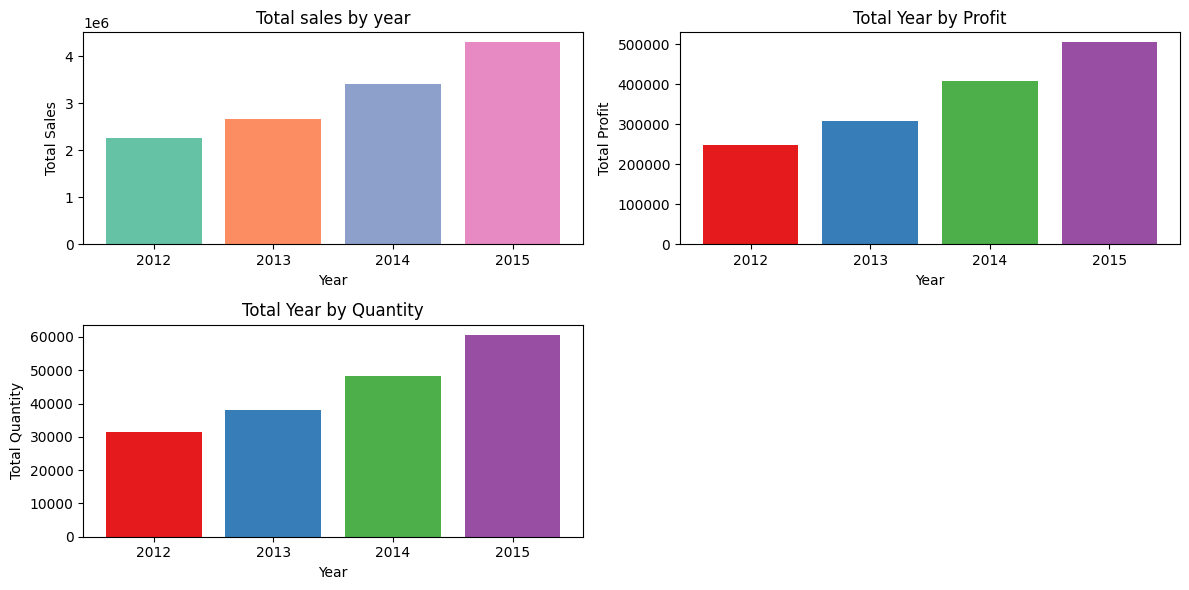

In [66]:
plt.figure(figsize=(12,6))
#sales plot
plt.subplot(2, 2, 1)
plt.bar(year_analysis['year'], year_analysis['Sales'], color=sns.color_palette('Set2'))
plt.xticks([2012,2013,2014,2015])
plt.title('Total sales by year')
plt.xlabel('Year')
plt.ylabel('Total Sales')

plt.subplot(2, 2, 2)
plt.bar(year_analysis['year'], year_analysis['Profit'], color=sns.color_palette('Set1'))
plt.xticks([2012,2013,2014,2015])
plt.title('Total Year by Profit')
plt.xlabel('Year')
plt.ylabel('Total Profit')

plt.subplot(2, 2, 3)
plt.bar(year_analysis['year'], year_analysis['Quantity'], color=sns.color_palette('Set1'))
plt.xticks([2012,2013,2014,2015])
plt.title('Total Year by Quantity')
plt.xlabel('Year')
plt.ylabel('Total Quantity')

plt.tight_layout()
plt.show()

In [77]:
pd.options.display.float_format = '{:,.2f}'.format

In [78]:
# Group data by month and calculate sum.
month_analysis = df.groupby("month").agg({"Sales": "sum",
                                        "Profit": "sum",
                                        "Quantity": "sum"}).reset_index()
month_analysis

,month,Sales,Profit,Quantity
0,1,"676,788.93","73,440.46",8872
1,2,"554,649.89","72,932.28",7429
2,3,"760,517.98","91,873.58",10390
3,4,"695,978.41","73,822.42",10466
4,5,"915,492.83","106,970.04",13196
5,6,"1,262,080.92","144,604.77",18009
6,7,"752,306.30","76,525.70",11046
7,8,"1,294,314.96","154,593.44",17596
8,9,"1,431,753.40","169,705.82",20479
9,10,"1,185,227.69","158,903.90",16303


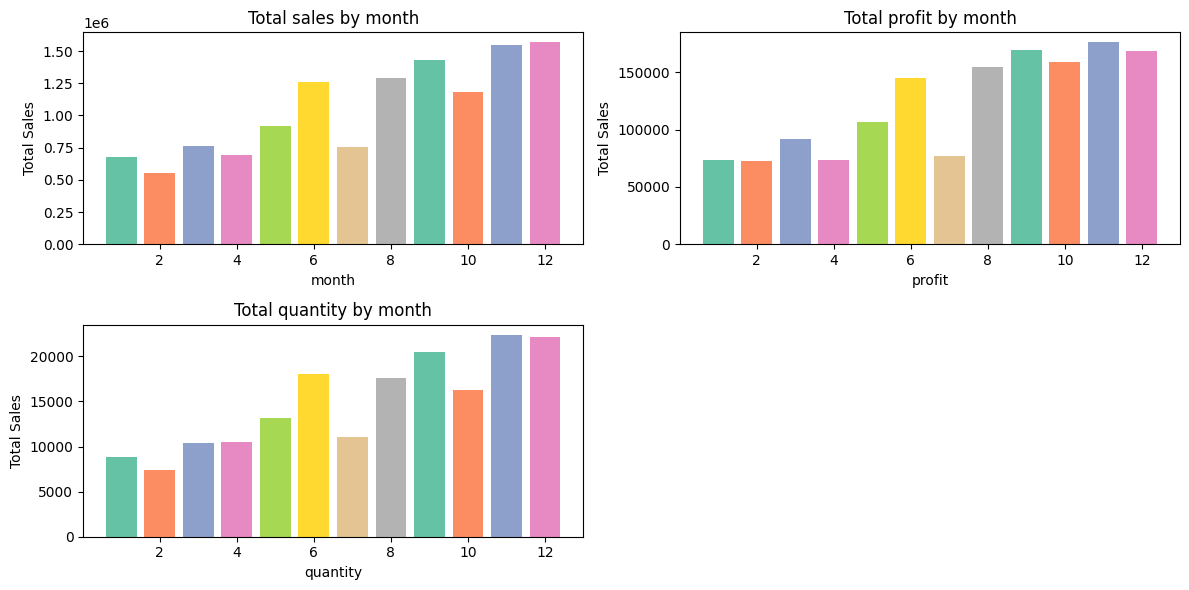

In [81]:
plt.figure(figsize=(12,6))
#sales plot
plt.subplot(2, 2, 1)
plt.bar(month_analysis['month'], month_analysis['Sales'], color=sns.color_palette('Set2'))
# plt.xticks([2012,2013,2014,2015])
plt.title('Total sales by month')
plt.xlabel('month')
plt.ylabel('Total Sales')

plt.subplot(2, 2, 2)
plt.bar(month_analysis['month'], month_analysis['Profit'], color=sns.color_palette('Set2'))
# plt.xticks([2012,2013,2014,2015])
plt.title('Total profit by month')
plt.xlabel('profit')
plt.ylabel('Total Sales')

plt.subplot(2, 2, 3)
plt.bar(month_analysis['month'], month_analysis['Quantity'], color=sns.color_palette('Set2'))
# plt.xticks([2012,2013,2014,2015])
plt.title('Total quantity by month')
plt.xlabel('quantity')
plt.ylabel('Total Sales')

plt.tight_layout()
plt.show()